# EDA 

In [2]:

import os
from collections import defaultdict
import shutil
from PIL import Image
import hashlib
import os
import pandas as pd
import numpy as np
import json
from matplotlib.patches import Patch
import matplotlib.pyplot as plt


### Load dataset and check distribution

In [24]:

# define the dataset path
dataset_path = r"C:\Users\Xuxu\Desktop\CCMT Dataset"

# dictionary to store the count of images per disease
image_counts = defaultdict(int)

total_images = 0
valid_extensions = {"jpg", "jpeg", "png", "bmp", "tiff", "gif"}  

# check if dataset path exists
if not os.path.exists(dataset_path):
    print(f"Error: The dataset folder '{dataset_path}' was not found.")
else:
    for crop in os.listdir(dataset_path):
        crop_path = os.path.join(dataset_path, crop)
        if os.path.isdir(crop_path):
            for disease in os.listdir(crop_path):
                disease_path = os.path.join(crop_path, disease)
                if os.path.isdir(disease_path):
                    num_images = len([f for f in os.listdir(disease_path) 
                                      if f.split('.')[-1].lower() in valid_extensions and not f.startswith('.')])
                    image_counts[f"{crop} - {disease}"] = num_images
                    total_images += num_images

    print("Disease-wise Image Count in CCMT Dataset:")
    for disease, count in image_counts.items():
        print(f"{disease}: {count} images")
    
    print(f"Total number of images in the dataset: {total_images}")


Disease-wise Image Count in CCMT Dataset:
Cashew - anthracnose: 1729 images
Cashew - gumosis: 392 images
Cashew - healthy: 1368 images
Cashew - leaf miner: 1378 images
Cashew - red rust: 1682 images
Cassava - bacterial blight: 2614 images
Cassava - brown spot: 1481 images
Cassava - green mite: 1015 images
Cassava - healthy: 1193 images
Cassava - mosaic: 1205 images
Maize - fall armyworm: 285 images
Maize - grasshoper: 673 images
Maize - healthy: 208 images
Maize - leaf beetle: 948 images
Maize - leaf blight: 1006 images
Maize - leaf spot: 1259 images
Maize - streak virus: 979 images
Tomato - healthy: 470 images
Tomato - leaf blight: 1301 images
Tomato - leaf curl: 518 images
Tomato - septoria leaf spot: 2743 images
Tomato - verticulium wilt: 773 images
Total number of images in the dataset: 25220


###  Remove insect classes

In [25]:

# list of insect-related diseases (folder names to be removed)
insect_diseases = {
    "leaf miner",
    "green mite",
    "fall armyworm",
    "grasshoper",
    "leaf beetle",
}

# traverse the dataset directory and remove insect disease folders
for crop_folder in os.listdir(dataset_path):
    crop_path = os.path.join(dataset_path, crop_folder)
    
    if not os.path.isdir(crop_path):
        continue
    
    for disease_folder in os.listdir(crop_path):
        disease_path = os.path.join(crop_path, disease_folder)
        
        if any(insect_disease in disease_folder.lower() for insect_disease in insect_diseases):
            shutil.rmtree(disease_path)
            print(f"Removed folder: {disease_path}")

# check the remaining crop folders after removal
remaining_folders = [crop_folder for crop_folder in os.listdir(dataset_path) 
                     if os.path.isdir(os.path.join(dataset_path, crop_folder))]
print(f"Remaining crop folders after removal: {remaining_folders}")


Removed folder: C:\Users\Xuxu\Desktop\CCMT Dataset\Cashew\leaf miner
Removed folder: C:\Users\Xuxu\Desktop\CCMT Dataset\Cassava\green mite
Removed folder: C:\Users\Xuxu\Desktop\CCMT Dataset\Maize\fall armyworm
Removed folder: C:\Users\Xuxu\Desktop\CCMT Dataset\Maize\grasshoper
Removed folder: C:\Users\Xuxu\Desktop\CCMT Dataset\Maize\leaf beetle
Remaining crop folders after removal: ['Cashew', 'Cassava', 'Maize', 'Tomato']


In [27]:
valid_extensions = {"jpg", "jpeg", "png", "bmp", "tiff", "gif"}
image_counts = defaultdict(int)
total_images = 0

if os.path.exists(dataset_path):
    for crop in os.listdir(dataset_path):
        crop_path = os.path.join(dataset_path, crop)
        if not os.path.isdir(crop_path):
            continue

        for disease in os.listdir(crop_path):
            disease_path = os.path.join(crop_path, disease)
            if not os.path.isdir(disease_path):
                continue

            num_images = sum(
                1 for f in os.listdir(disease_path)
                if f.split('.')[-1].lower() in valid_extensions and not f.startswith('.')
            )
            image_counts[f"{crop} - {disease}"] = num_images
            total_images += num_images

    print("Image Count in CCMT Dataset:")
    for disease, count in image_counts.items():
        print(f"{disease}: {count} images")
    print(f"Total number of images in the dataset: {total_images}")
else:
    print(f" Dataset path '{dataset_path}' not found.")


Image Count in CCMT Dataset:
Cashew - anthracnose: 1729 images
Cashew - gumosis: 392 images
Cashew - healthy: 1368 images
Cashew - red rust: 1682 images
Cassava - bacterial blight: 2614 images
Cassava - brown spot: 1481 images
Cassava - healthy: 1193 images
Cassava - mosaic: 1205 images
Maize - healthy: 208 images
Maize - leaf blight: 1006 images
Maize - leaf spot: 1259 images
Maize - streak virus: 979 images
Tomato - healthy: 470 images
Tomato - leaf blight: 1301 images
Tomato - leaf curl: 518 images
Tomato - septoria leaf spot: 2743 images
Tomato - verticulium wilt: 773 images
Total number of images in the dataset: 20921


### Remove corrupted images 

In [28]:


def find_actually_corrupted_images(folder):
    corrupted = []
    for root, _, files in os.walk(folder):
        for file in files:
            if file.lower().endswith((".jpg", ".jpeg", ".png")):
                path = os.path.join(root, file)
                try:
                    with Image.open(path) as img:
                        img.convert("RGB")  
                        img.load()          
                except Exception as e:
                    print(f" Corrupted: {path} ({e})")
                    corrupted.append(path)
    return corrupted

corrupted_images = find_actually_corrupted_images("C:/Users/Xuxu/Desktop/CCMT Dataset")
print(f"\n Found {len(corrupted_images)} corrupted images.")


 Corrupted: C:/Users/Xuxu/Desktop/CCMT Dataset\Maize\healthy\healthy189_.jpg (broken data stream when reading image file)
 Corrupted: C:/Users/Xuxu/Desktop/CCMT Dataset\Maize\healthy\healthy18_.jpg (cannot identify image file 'C:\\Users\\Xuxu\\Desktop\\CCMT Dataset\\Maize\\healthy\\healthy18_.jpg')
 Corrupted: C:/Users/Xuxu/Desktop/CCMT Dataset\Maize\healthy\healthy87_.jpg (broken data stream when reading image file)
 Corrupted: C:/Users/Xuxu/Desktop/CCMT Dataset\Maize\healthy\healthy88_.jpg (cannot identify image file 'C:\\Users\\Xuxu\\Desktop\\CCMT Dataset\\Maize\\healthy\\healthy88_.jpg')
 Corrupted: C:/Users/Xuxu/Desktop/CCMT Dataset\Maize\leaf blight\leaf blight379_.jpg (broken data stream when reading image file)
 Corrupted: C:/Users/Xuxu/Desktop/CCMT Dataset\Maize\leaf blight\leaf blight37_.jpg (cannot identify image file 'C:\\Users\\Xuxu\\Desktop\\CCMT Dataset\\Maize\\leaf blight\\leaf blight37_.jpg')
 Corrupted: C:/Users/Xuxu/Desktop/CCMT Dataset\Maize\leaf blight\leaf blight4

In [29]:


removed_count = 0

for path in corrupted_images:
    try:
        os.remove(path)
        removed_count += 1
    except Exception as e:
        pass  # You can log the error if needed

print(f"Finished removing {removed_count} corrupted images.")


Finished removing 79 corrupted images.


In [31]:

total_images = sum(
    1 for root, _, files in os.walk(dataset_path)
    for file in files
    if file.split('.')[-1].lower() in valid_extensions and not file.startswith('.')
)

print(f"Total number of images in the dataset: {total_images}")

Total number of images in the dataset: 20842


### Remove duplicates

In [32]:

hash_dict = defaultdict(list)

def get_image_hash(image_path):
    with open(image_path, "rb") as f:
        return hashlib.md5(f.read()).hexdigest()

# Traverse and hash images
for root, _, files in os.walk(dataset_directory):
    for file in files:
        if file.lower().endswith((".png", ".jpg", ".jpeg", ".bmp", ".tiff")):
            file_path = os.path.join(root, file)
            img_hash = get_image_hash(file_path)
            hash_dict[img_hash].append(file_path)

# Count duplicates (not remove)
duplicates = {h: paths for h, paths in hash_dict.items() if len(paths) > 1}
total_duplicates = sum(len(paths) - 1 for paths in duplicates.values())

print(f"Total duplicate images found: {total_duplicates}")



Total duplicate images found: 829


In [33]:
# Remove duplicates (keep the first, remove the rest)
removed_count = 0

for paths in duplicates.values():
    for path in paths[1:]:
        if os.path.exists(path):
            os.remove(path)
            removed_count += 1

print(f"Total duplicate images removed: {removed_count}")


Total duplicate images removed: 829


In [34]:
valid_extensions = {"jpg", "jpeg", "png", "bmp", "tiff", "gif"}

total_images = sum(
    1 for root, _, files in os.walk(dataset_path)
    for file in files
    if file.split('.')[-1].lower() in valid_extensions and not file.startswith('.')
)

print(f"Total number of images in the dataset: {total_images}")


Total number of images in the dataset: 20013


### Stratisfied Split Check

In [38]:
# imports
import os
import pandas as pd
import numpy as np
import json

split_dir = r"C:/Users/Xuxu/Desktop/Master Thesis/OptunaDensenetFull"

class_to_idx_path = os.path.join(split_dir, "class_to_idx.json")
train_indices_path = os.path.join(split_dir, "train_indices.npy")
val_indices_path = os.path.join(split_dir, "val_indices.npy")
test_indices_path = os.path.join(split_dir, "test_indices.npy")

# load mappings
with open(class_to_idx_path, "r") as f:
    class_to_idx = json.load(f)

# reverse mapping from index to class name
idx_to_class = {v: k for k, v in class_to_idx.items()}

# load split indices
train_indices = np.load(train_indices_path)
val_indices = np.load(val_indices_path)
test_indices = np.load(test_indices_path)

# load image paths and labels
image_paths = []
labels = []

for crop in sorted(os.listdir(dataset_path)):
    for disease in sorted(os.listdir(os.path.join(dataset_path, crop))):
        class_name = f"{crop}_{disease}"
        class_idx = class_to_idx[class_name]
        img_dir = os.path.join(dataset_path, crop, disease)
        
        for img_file in os.listdir(img_dir):
            if img_file.lower().endswith(("jpg", "jpeg", "png")):
                image_paths.append(os.path.join(img_dir, img_file))
                labels.append(class_idx)

labels = np.array(labels)

# create distribution table
df_data = []

for idx, class_name in idx_to_class.items():
    total_images = np.sum(labels == idx)
    train_images = np.sum(labels[train_indices] == idx)
    val_images = np.sum(labels[val_indices] == idx)
    test_images = np.sum(labels[test_indices] == idx)

    df_data.append({
        "Disease": class_name,
        "Images": total_images,
        "Training": train_images,
        "Validation": val_images,
        "Test": test_images
    })

df = pd.DataFrame(df_data)

# sort alphabetically
df = df.sort_values("Disease").reset_index(drop=True)

# show and save
print(df)

save_path = "dataset_distribution_table.csv"
df.to_csv(save_path, index=False)
print(f"\nsaved clean dataset table to: {save_path}")


                      Disease  Images  Training  Validation  Test
0          Cashew_anthracnose    1729      1383         173   173
1              Cashew_gumosis     392       314          39    39
2              Cashew_healthy    1368      1094         137   137
3             Cashew_red rust    1681      1345         168   168
4    Cassava_bacterial blight    2594      2075         259   260
5          Cassava_brown spot    1465      1172         146   147
6             Cassava_healthy    1193       954         119   120
7              Cassava_mosaic    1113       890         111   112
8               Maize_healthy     204       163          21    20
9           Maize_leaf blight     987       790          99    98
10            Maize_leaf spot    1044       835         105   104
11         Maize_streak virus     917       734          92    91
12             Tomato_healthy     463       370          47    46
13         Tomato_leaf blight    1286      1029         128   129
14        

# Class Imbalance 


Total images in dataset: 20013
Training set: 16010 images
Validation set: 2001 images
Test set: 2002 images


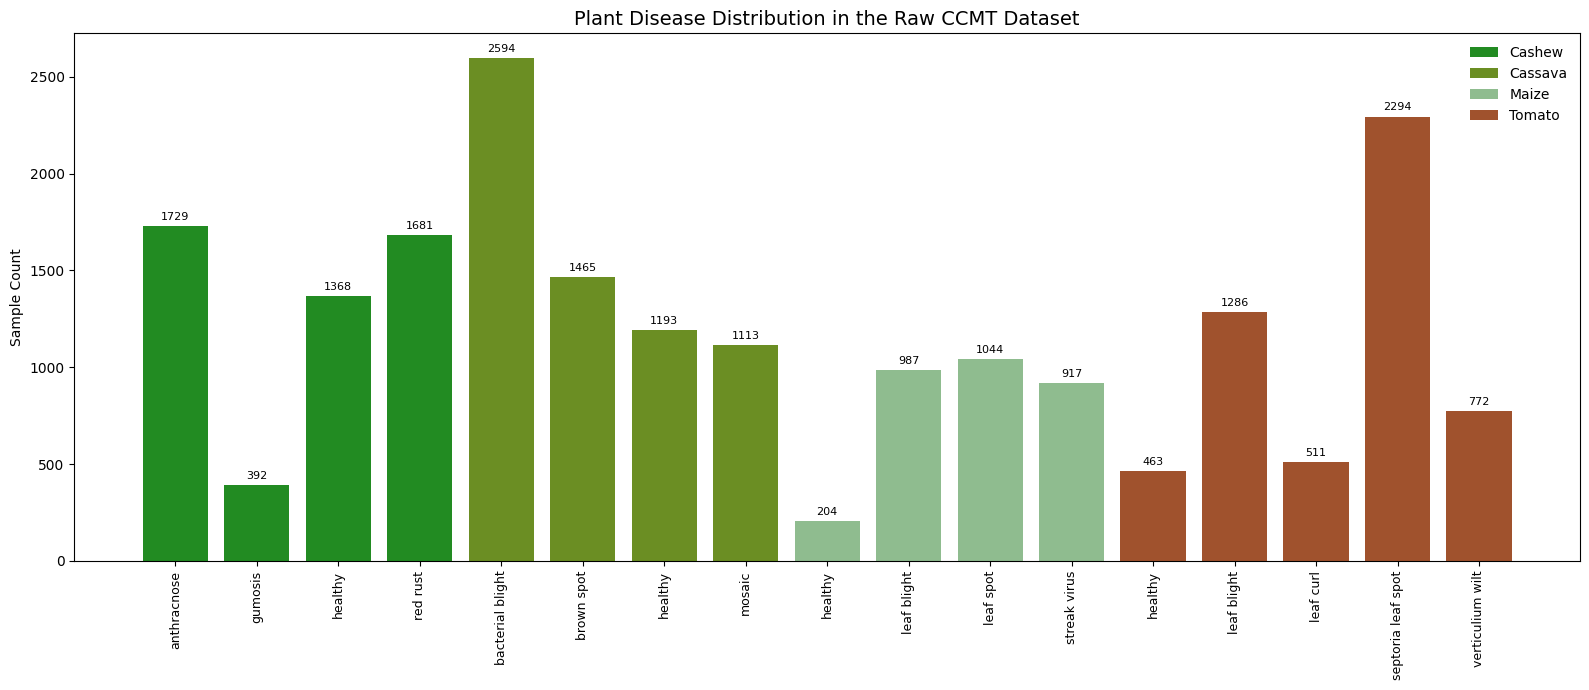

In [39]:


with open(class_to_idx_path, "r") as f:
    class_to_idx = json.load(f)

idx_to_class = {v: k for k, v in class_to_idx.items()}

image_paths = []
labels = []

for crop in sorted(os.listdir(dataset_path)):
    for disease in sorted(os.listdir(os.path.join(dataset_path, crop))):
        class_name = f"{crop}_{disease}"
        if class_name not in class_to_idx:
            continue
        class_idx = class_to_idx[class_name]
        img_dir = os.path.join(dataset_path, crop, disease)

        for img_file in os.listdir(img_dir):
            if img_file.lower().endswith(("jpg", "jpeg", "png")):
                image_paths.append(os.path.join(img_dir, img_file))
                labels.append(class_idx)

labels = np.array(labels)

class_counts = defaultdict(dict)

for idx, class_name in idx_to_class.items():
    crop, disease = class_name.split("_", 1)
    total_images = np.sum(labels == idx)
    class_counts[crop][disease] = total_images

crop_names = sorted(class_counts.keys())
clean_colors = {
    crop: color for crop, color in zip(
        crop_names,
        ['#228B22', '#6B8E23', '#8FBC8F', '#A0522D']  # ForestGreen, OliveDrab, SeaGreen, Sienna
    )
}

labels_text = []
counts = []
colors = []
start_idx = 0

for crop in crop_names:
    diseases = class_counts[crop]
    for disease, count in diseases.items():
        labels_text.append(disease)    
        counts.append(count)
        colors.append(clean_colors[crop])
    start_idx += len(diseases)

fig, ax = plt.subplots(figsize=(16, 7))
bars = ax.bar(range(len(counts)), counts, color=colors)

for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=8)

ax.set_xticks(range(len(labels_text)))
ax.set_xticklabels(labels_text, rotation=90, fontsize=9)

ax.set_ylabel("Sample Count")
ax.set_title("Plant Disease Distribution in the Raw CCMT Dataset", fontsize=14)

# Clean box and light gridlines
for spine in ax.spines.values():
    spine.set_visible(True)


plt.tight_layout()

legend_elements = [
    Patch(facecolor='#228B22', label='Cashew'),
    Patch(facecolor='#6B8E23', label='Cassava'),
    Patch(facecolor='#8FBC8F', label='Maize'),
    Patch(facecolor='#A0522D', label='Tomato')
]

ax.legend(handles=legend_elements, loc='upper right', fontsize=10, title_fontsize=11, frameon=False)

save_dir = r"C:/Users/Xuxu/Desktop/Master Thesis"
save_path = os.path.join(save_dir, "plant_disease_distribution.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')  # High-res PNG

train_indices = np.load(train_indices_path)
val_indices = np.load(val_indices_path)
test_indices = np.load(test_indices_path)

print(f"\nTotal images in dataset: {len(labels)}")
print(f"Training set: {len(train_indices)} images")
print(f"Validation set: {len(val_indices)} images")
print(f"Test set: {len(test_indices)} images")


